# Metro-Bike-Share

Data Source: https://bikeshare.metro.net/about/data/

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
import datetime
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

Trip Data 

In [3]:
file = os.path.join(path, 'datasets', 'metro-trips-2021.csv')
trip_df = pd.read_csv(file)

Station Table

In [4]:
file1 = os.path.join(path, 'datasets', 'metro-bike-share-stations-2022-04-01_StationTable.csv')
station_df = pd.read_csv(file1, encoding='cp1252')

# Head and Tail

In [5]:
trip_df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,151713183,17,1/1/2021 1:45,1/1/2021 2:02,3005,34.048500,-118.258537,4304,34.062580,-118.290092,5894,1,One Way,Walk-up,standard
1,151713983,7,1/1/2021 2:35,1/1/2021 2:42,4390,34.069271,-118.296593,4456,34.052429,-118.302017,16901,365,One Way,Annual Pass,electric
2,151716483,8,1/1/2021 4:28,1/1/2021 4:36,3052,34.051102,-118.264557,4314,34.057709,-118.279762,6005,30,One Way,Monthly Pass,standard
3,151721185,208,1/1/2021 4:43,1/1/2021 8:11,3034,34.042061,-118.263382,3031,34.044701,-118.252441,5852,1,One Way,Walk-up,standard
4,151720984,129,1/1/2021 5:53,1/1/2021 8:02,4446,34.053230,-118.278419,4446,34.053230,-118.278419,12075,1,Round Trip,Walk-up,standard


In [6]:
trip_df.shape

(220997, 15)

In [7]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220997 entries, 0 to 220996
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              220997 non-null  int64  
 1   duration             220997 non-null  int64  
 2   start_time           220997 non-null  object 
 3   end_time             220997 non-null  object 
 4   start_station        220997 non-null  int64  
 5   start_lat            220770 non-null  float64
 6   start_lon            220770 non-null  float64
 7   end_station          220997 non-null  int64  
 8   end_lat              215391 non-null  float64
 9   end_lon              215391 non-null  float64
 10  bike_id              220997 non-null  object 
 11  plan_duration        220997 non-null  int64  
 12  trip_route_category  220997 non-null  object 
 13  passholder_type      220996 non-null  object 
 14  bike_type            220997 non-null  object 
dtypes: float64(4), in

In [8]:
station_df.head()

,Station_ID,Station_Name,Day of Go_live_date,Region,Status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,DTLA,Active
2,3006,Olive & 8th,7/7/2016,DTLA,Active
3,3007,5th & Grand,7/7/2016,DTLA,Active
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active


In [9]:
station_df.shape

(375, 5)

In [10]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Station_ID           375 non-null    int64 
 1   Station_Name         375 non-null    object
 2   Day of Go_live_date  375 non-null    object
 3   Region               374 non-null    object
 4   Status               375 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.8+ KB


In [11]:
trip_df.dtypes.value_counts()

object     6
int64      5
float64    4
dtype: int64

In [12]:
station_df.dtypes.value_counts()

object    4
int64     1
dtype: int64

In [13]:
# check unique keys start, end and id (stations)
uniq_start = trip_df['start_station'].nunique()
uniq_end = trip_df['end_station'].nunique()
uniq_statId = station_df['Station_ID'].nunique()

print('Unique Start Station: {0}; Unique End Station {1}; Unique Station ID: {2}'.format(uniq_start, uniq_end, uniq_statId))

Unique Start Station: 230; Unique End Station 231; Unique Station ID: 375


In [14]:
trip_df[['start_time', 'end_time']] = trip_df[['start_time', 'end_time']].apply(pd.to_datetime)   # convert dates to pandas datetime

In [15]:
trip_df[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220997 entries, 0 to 220996
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_time  220997 non-null  datetime64[ns]
 1   end_time    220997 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 3.4 MB


In [16]:
trip_df['day_name'] = trip_df['start_time'].dt.day_name()                                          # extract day name    
trip_df['day'] = trip_df['start_time'].dt.day                                                      # extract day
trip_df['month'] = trip_df['start_time'].dt.month                                                  # extract month
trip_df['week'] = trip_df['start_time'].dt.week                                                    # extract week
trip_df['year'] = trip_df['start_time'].dt.year                                                    # extract year

trip_df[['day_name', 'day', 'month', 'week', 'year']]

,day_name,day,month,week,year
0,Friday,1,1,53,2021
1,Friday,1,1,53,2021
2,Friday,1,1,53,2021
3,Friday,1,1,53,2021
4,Friday,1,1,53,2021
...,...,...,...,...,...
220992,Friday,31,12,52,2021
220993,Friday,31,12,52,2021
220994,Friday,31,12,52,2021
220995,Friday,31,12,52,2021


In [17]:
# change day_name to categorical
ordered_dayname = ['Monday', 'Tuesday', 'Wednesday', 'Thursday' , 'Friday', 'Saturday', 'Sunday']

trip_df['day_name'] = pd.Categorical(trip_df['day_name'], ordered_dayname)

trip_df['day_name'].dtype

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
, ordered=False)

# Missing Data Exploration

In [18]:
trip_df.isna().sum()                                                 # less than 1% missing data in (longitute and latitude) columns

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat               227
start_lon               227
end_station               0
end_lat                5606
end_lon                5606
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           1
bike_type                 0
day_name                  0
day                       0
month                     0
week                      0
year                      0
dtype: int64

In [19]:
station_df.isna().sum()

Station_ID             0
Station_Name           0
Day of Go_live_date    0
Region                 1
Status                 0
dtype: int64

<AxesSubplot:>

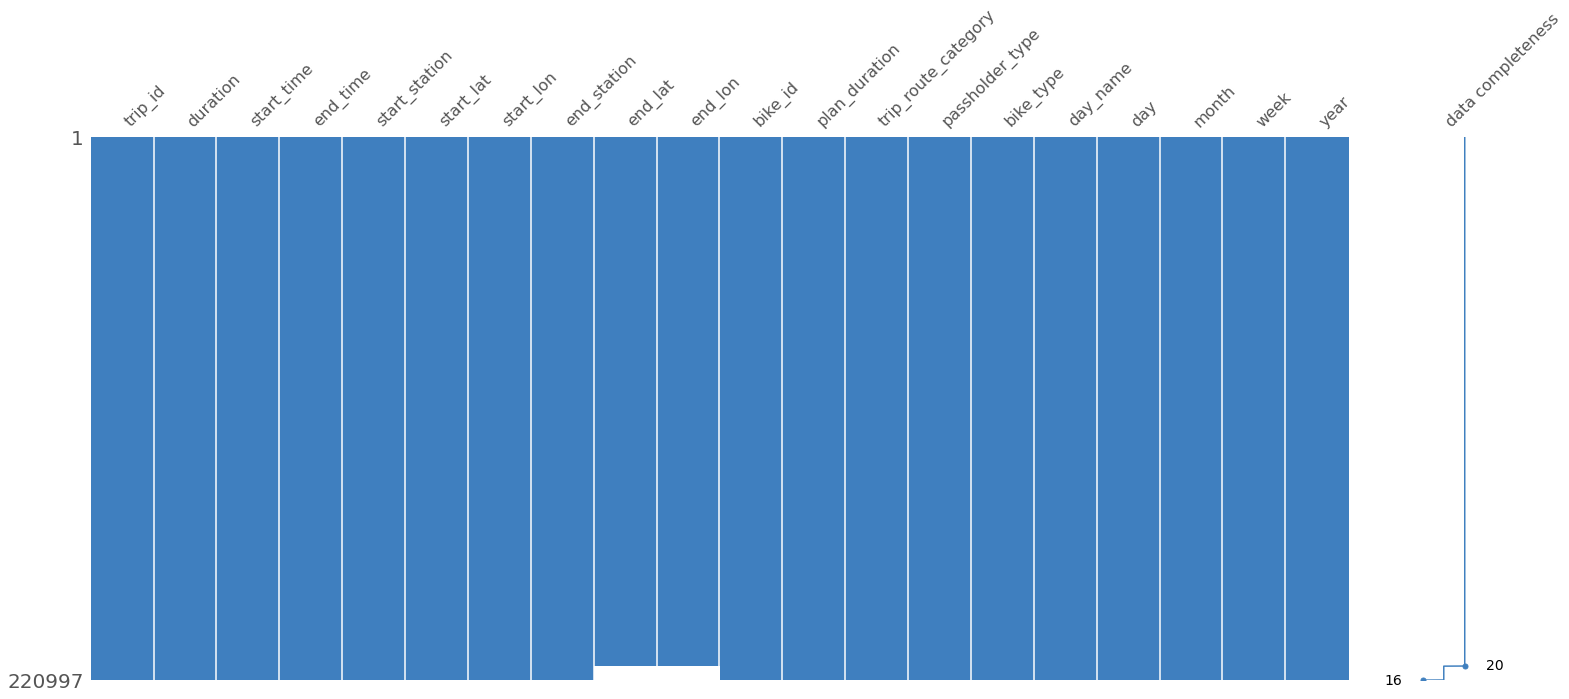

In [20]:
msno.matrix(trip_df, labels=True, sort='descending', color=(0.25, 0.50, 0.75))

<AxesSubplot:>

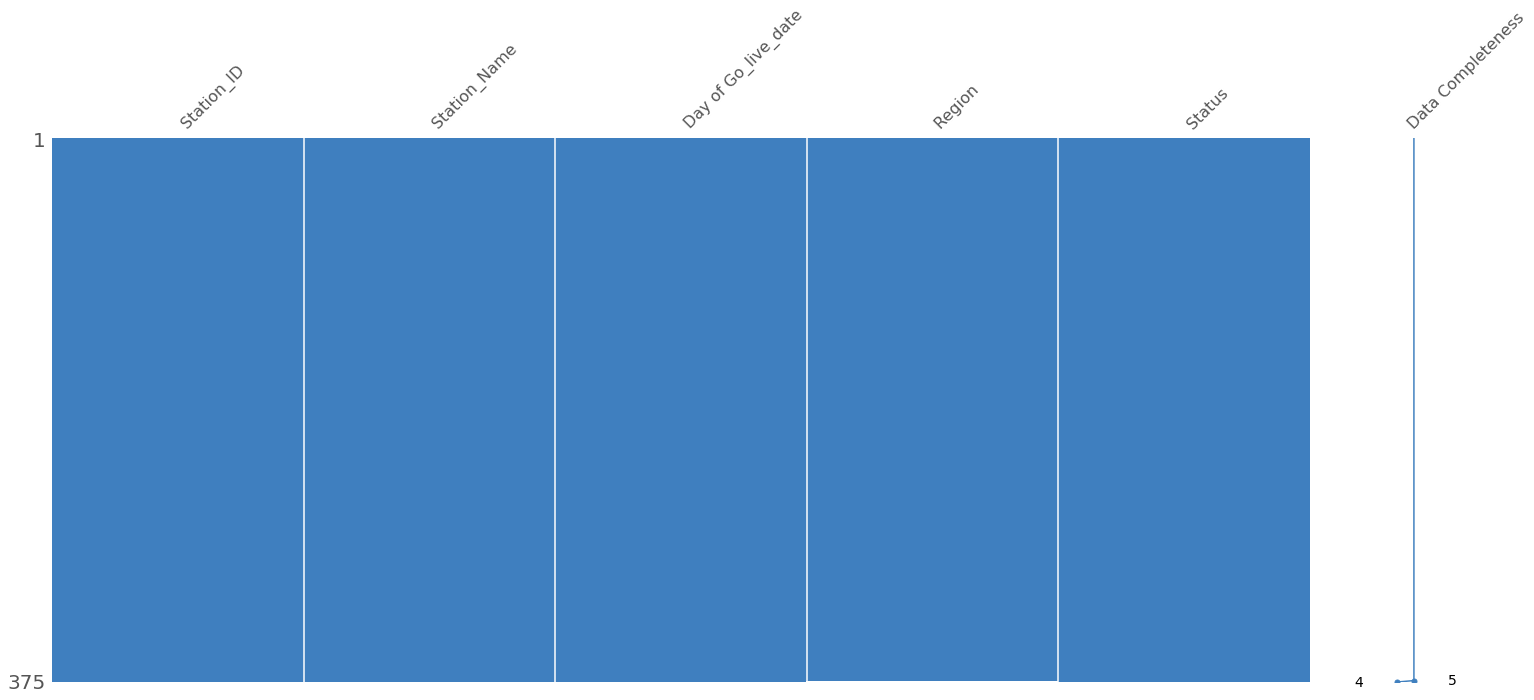

In [21]:
msno.matrix(station_df, labels=True, sort='descending', color=(0.25, 0.50, 0.75))

In [22]:
df_drop = trip_df.dropna()                                           # drop missing values
df_drop.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,day_name,day,month,week,year
0,151713183,17,2021-01-01 01:45:00,2021-01-01 02:02:00,3005,34.048500,-118.258537,4304,34.062580,-118.290092,5894,1,One Way,Walk-up,standard,Friday,1,1,53,2021
1,151713983,7,2021-01-01 02:35:00,2021-01-01 02:42:00,4390,34.069271,-118.296593,4456,34.052429,-118.302017,16901,365,One Way,Annual Pass,electric,Friday,1,1,53,2021
2,151716483,8,2021-01-01 04:28:00,2021-01-01 04:36:00,3052,34.051102,-118.264557,4314,34.057709,-118.279762,6005,30,One Way,Monthly Pass,standard,Friday,1,1,53,2021
3,151721185,208,2021-01-01 04:43:00,2021-01-01 08:11:00,3034,34.042061,-118.263382,3031,34.044701,-118.252441,5852,1,One Way,Walk-up,standard,Friday,1,1,53,2021
4,151720984,129,2021-01-01 05:53:00,2021-01-01 08:02:00,4446,34.053230,-118.278419,4446,34.053230,-118.278419,12075,1,Round Trip,Walk-up,standard,Friday,1,1,53,2021


In [23]:
df_drop.isna().sum()

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
day_name               0
day                    0
month                  0
week                   0
year                   0
dtype: int64

<AxesSubplot:>

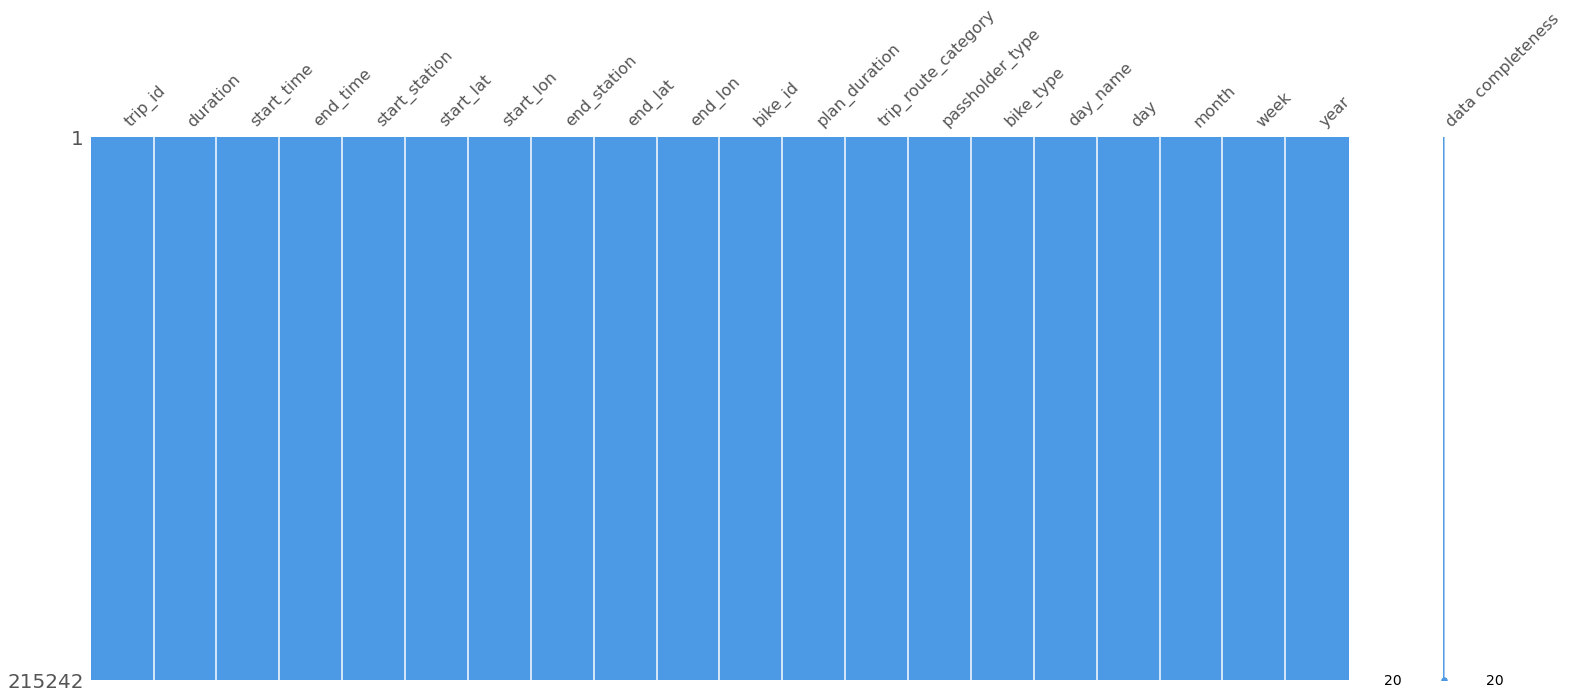

In [24]:
msno.matrix(df_drop, labels=True, sort='descending', color=(0.3, 0.6, 0.9))

In [25]:
df_drop.describe(include='object')

,bike_id,trip_route_category,passholder_type,bike_type
count,215242,215242,215242,215242
unique,3095,2,5,3
top,17174,One Way,Monthly Pass,standard
freq,758,165780,101397,161299


In [26]:
station_df.describe(include='object')

,Station_Name,Day of Go_live_date,Region,Status
count,375,375,374,375
unique,319,156,6,2
top,Westwood & National,7/7/2016,DTLA,Active
freq,3,55,166,220


In [27]:
df_drop['bike_id'].value_counts()

17174    758
16600    736
19112    627
16914    624
16992    623
        ... 
14054      1
15941      1
13700      1
13420      1
15244      1
Name: bike_id, Length: 3095, dtype: int64

# Exploratory Data Analysis

In [28]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.0f' % (x * 1)

format_orig = FuncFormatter(original)


# helper function for plotting bar charts
def plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, palette=palette,
        ci=ci, 
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine plot axes
    sns.despine(bottom=True, left=True)

    return plot_bar


# helper function to plot pie charts
def plot_pie(series, label, title=None, xlabel=None, ylabel=None, shadow=None, startangle=None):
    fig1, ax1 = plt.subplots()
    ax1.pie(x=series.value_counts(normalize=True).values, labels=label.value_counts(normalize=True).keys(), 
            autopct='%1.1f%%', shadow=shadow, startangle=startangle)
    ax1.axis('equal')

    ax1.set(title=title, xlabel=xlabel, ylabel=ylabel)
    
    return plot_pie


# helper function to plot line charts
def plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, palette=palette, 
        style=style, 
        ci=ci, ax=ax)

    # label plot axes
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine plot 
    sns.despine(bottom=True, left=True)

    return plot_line


# helper function to get specific date range
def fetch_data(data, ascending=None, before=None, after=None, rule=None):
    return data.sort_index(ascending=ascending).truncate(before=before, after=after).resample(rule=rule)


# helper function to plot specific date range
def plot_date_rng(data, x, y, hue=None, palette=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data,
        x=x, y=y,
        hue=hue, palette=palette, 
        size=size, style=style,
        ci=None, ax=ax
    )

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine plot axes
    sns.despine(bottom=True, left=True)

    return plot_date_rng

"Round Trip" for trips starting and ending at the same station or "One Way" for all other trips

In [29]:
df_drop['trip_route_category'].value_counts()                       # count

One Way       165780
Round Trip     49462
Name: trip_route_category, dtype: int64

<function __main__.plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None)>

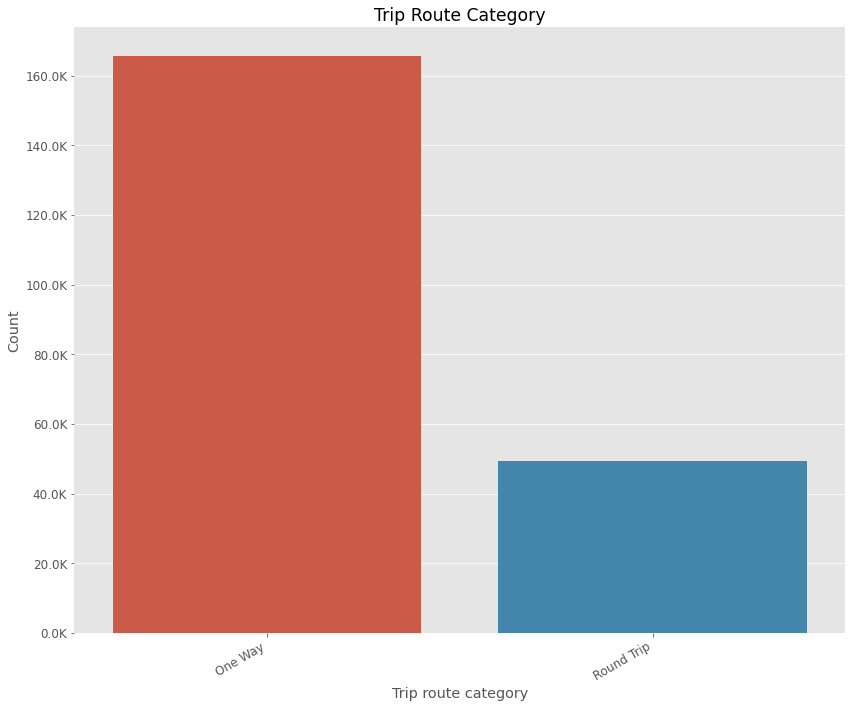

In [30]:
plot_bar(
    x=df_drop['trip_route_category'].value_counts().keys(), y=df_drop['trip_route_category'].value_counts().values,
    xlabel='Trip route category', ylabel='Count', title='Trip Route Category',
    formatter=format_tsd
)

In [31]:
df_drop['trip_route_category'].value_counts(normalize=True)         # proportions

One Way       0.770203
Round Trip    0.229797
Name: trip_route_category, dtype: float64

<function __main__.plot_pie(series, label, title=None, xlabel=None, ylabel=None, shadow=None, startangle=None)>

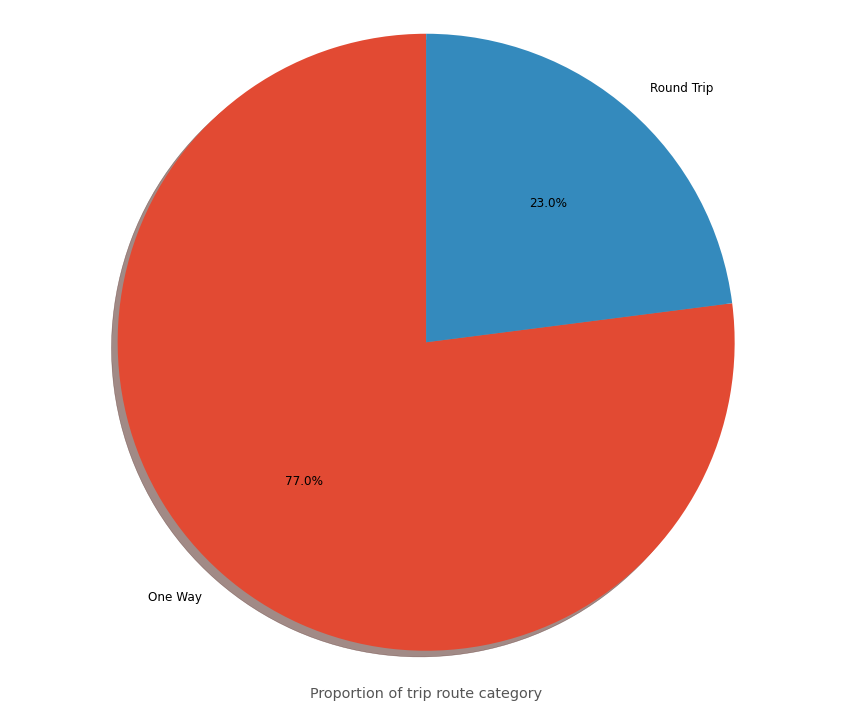

In [32]:
plot_pie(
    series=df_drop['trip_route_category'], label=df_drop['trip_route_category'], shadow=True, startangle=90,
    xlabel='Proportion of trip route category'
)

The name of the passholder's plan

In [33]:
df_drop['passholder_type'].value_counts()                           # count

Monthly Pass    101397
Walk-up          67435
One Day Pass     25663
Annual Pass      20746
Testing              1
Name: passholder_type, dtype: int64

<function __main__.plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None)>

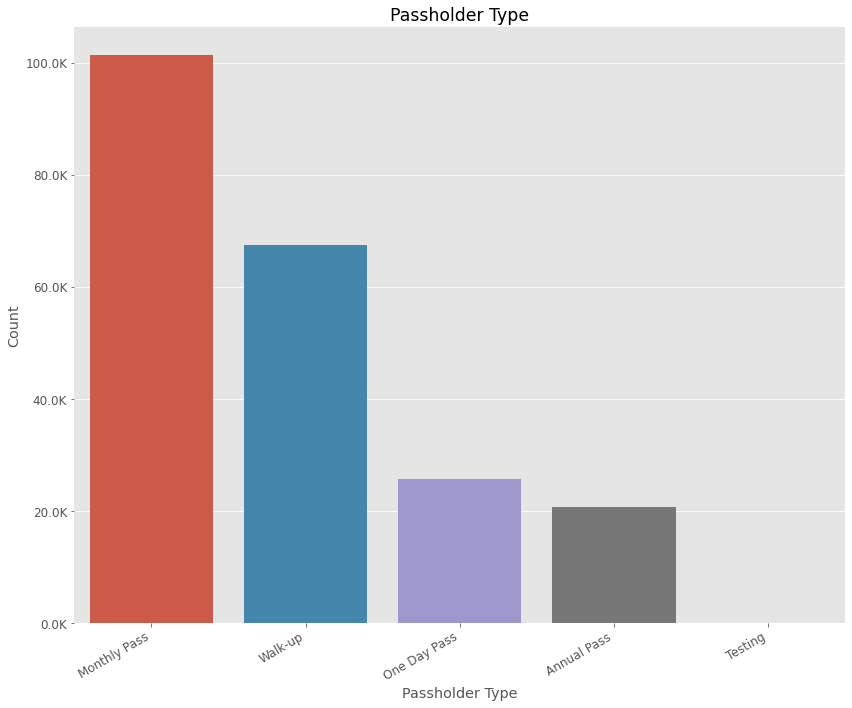

In [34]:
plot_bar(
    x=df_drop['passholder_type'].value_counts().keys(), y=df_drop['passholder_type'].value_counts().values,
    xlabel='Passholder Type', ylabel='Count', title='Passholder Type',
    formatter=format_tsd
)

In [35]:
df_drop['passholder_type'].value_counts(normalize=True)             # proportions

Monthly Pass    0.471084
Walk-up         0.313299
One Day Pass    0.119229
Annual Pass     0.096385
Testing         0.000005
Name: passholder_type, dtype: float64

<function __main__.plot_pie(series, label, title=None, xlabel=None, ylabel=None, shadow=None, startangle=None)>

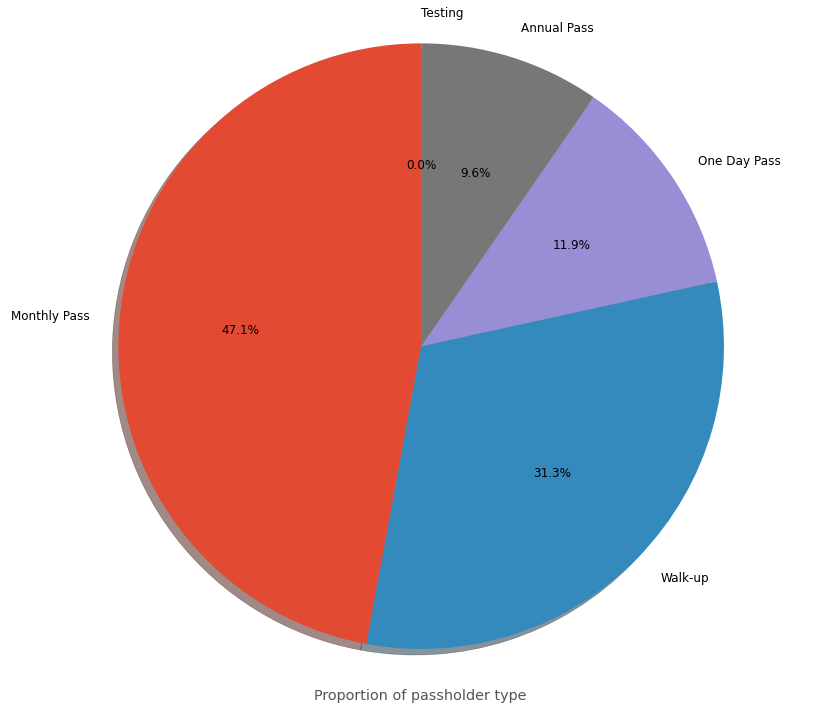

In [36]:
plot_pie(
    series=df_drop['passholder_type'], label=df_drop['passholder_type'], shadow=True, startangle=90,
    xlabel='Proportion of passholder type')

The kind of bike used on the trip, including standard pedal-powered bikes, electric assist bikes, or smart bikes

In [37]:
df_drop['bike_type'].value_counts()

standard    161299
electric     52225
smart         1718
Name: bike_type, dtype: int64

<function __main__.plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None)>

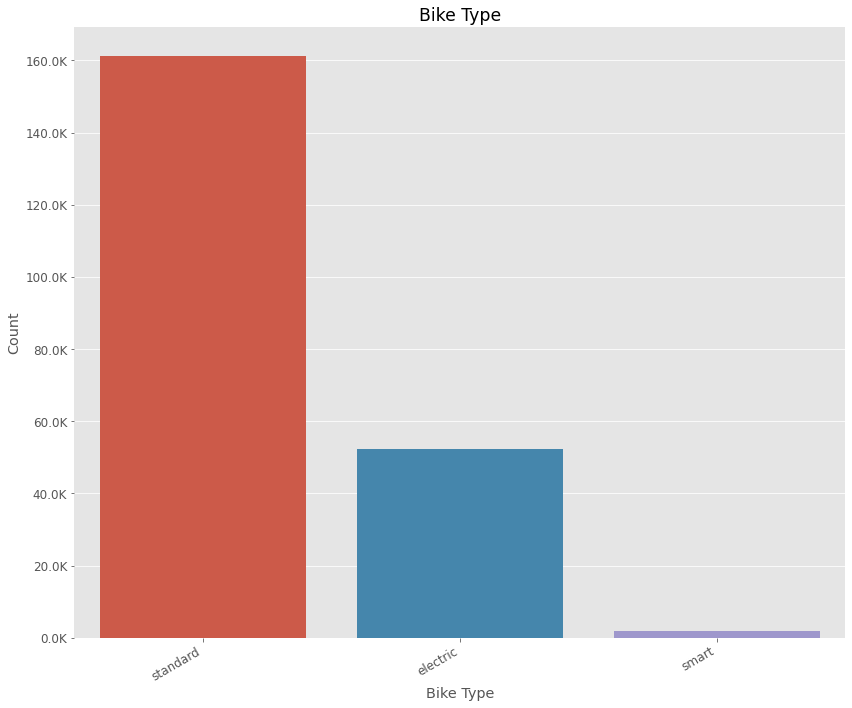

In [38]:
plot_bar(
    x=df_drop['bike_type'].value_counts().keys(), y=df_drop['bike_type'].value_counts().values,
    xlabel='Bike Type', ylabel='Count', title='Bike Type',
    formatter=format_tsd
)

In [39]:
df_drop['bike_type'].value_counts(normalize=True)

standard    0.749384
electric    0.242634
smart       0.007982
Name: bike_type, dtype: float64

<function __main__.plot_pie(series, label, title=None, xlabel=None, ylabel=None, shadow=None, startangle=None)>

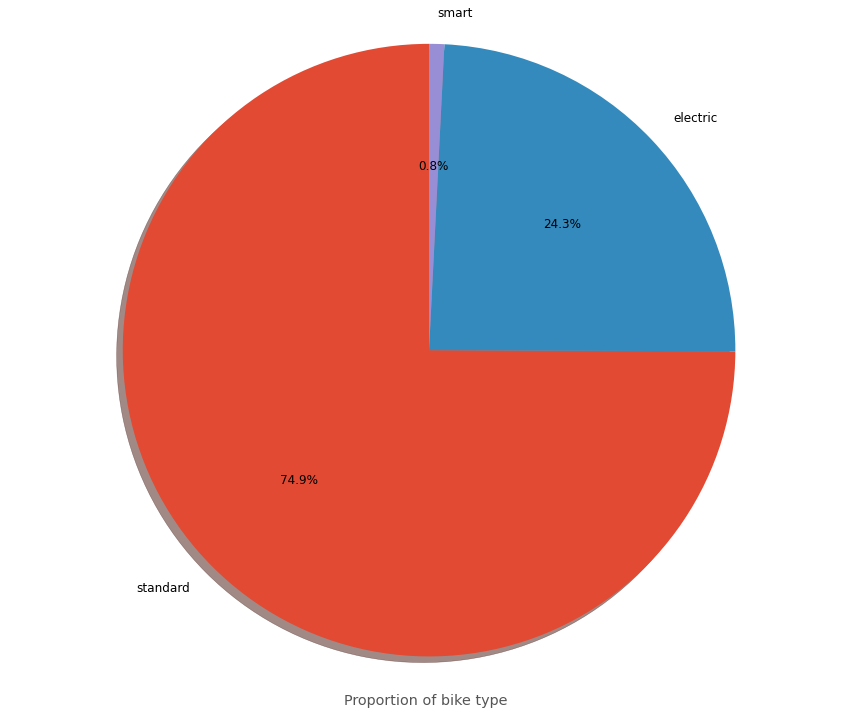

In [40]:
plot_pie(
    series=df_drop['bike_type'], label=df_drop['bike_type'], shadow=True, startangle=90,
    xlabel='Proportion of bike type'
)

In [41]:
df_drop['day_name'].value_counts()

Saturday     36860
Sunday       35966
Friday       31298
Thursday     28488
Tuesday      28165
Wednesday    27997
Monday       26468
Name: day_name, dtype: int64

<function __main__.plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None)>

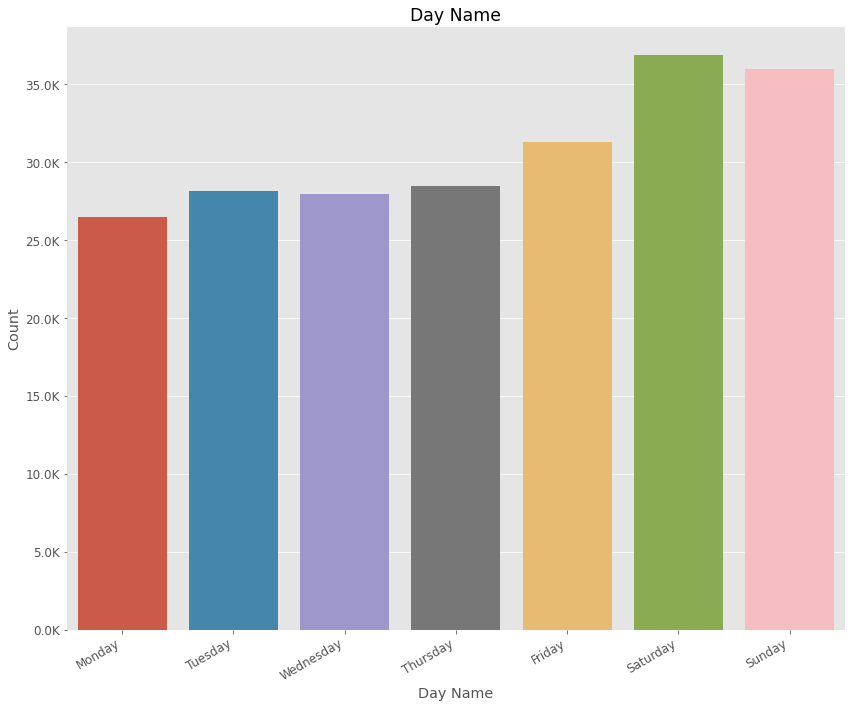

In [42]:
plot_bar(
    x=df_drop['day_name'].value_counts().keys(), y=df_drop['day_name'].value_counts().values,
    xlabel='Day Name', ylabel='Count', title='Day Name',
    formatter=format_tsd
)

In [43]:
df_drop['day_name'].value_counts(normalize=True)

Saturday     0.171249
Sunday       0.167096
Friday       0.145408
Thursday     0.132353
Tuesday      0.130853
Wednesday    0.130072
Monday       0.122969
Name: day_name, dtype: float64

<function __main__.plot_pie(series, label, title=None, xlabel=None, ylabel=None, shadow=None, startangle=None)>

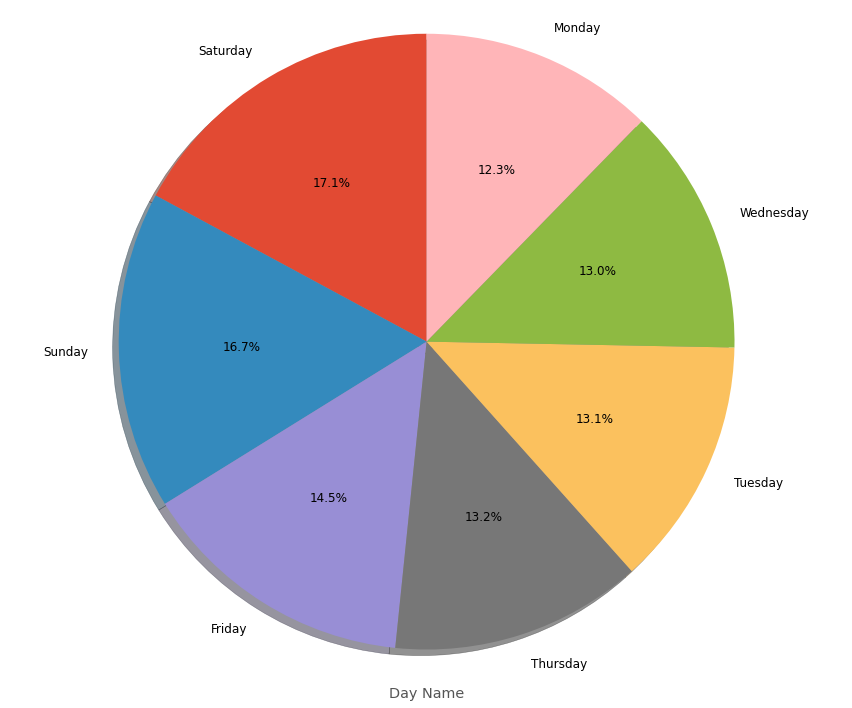

In [44]:
plot_pie(
    series=df_drop['day_name'], label=df_drop['day_name'], shadow=True, startangle=90,
    xlabel='Day Name'
)

In [45]:
df_drop['day'].value_counts().head()

10    8044
4     7759
20    7589
6     7462
18    7436
Name: day, dtype: int64

<function __main__.plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None)>

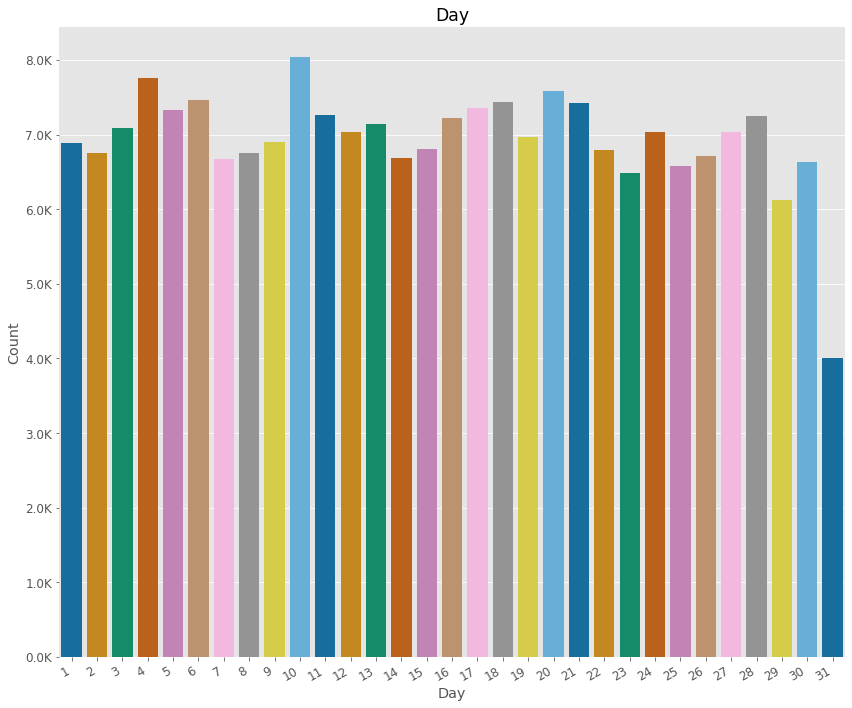

In [46]:
plot_bar(
    x=df_drop['day'].value_counts().keys(), y=df_drop['day'].value_counts().values,
    xlabel='Day', ylabel='Count', title='Day', palette='colorblind',
    formatter=format_tsd
)

In [47]:
df_drop['month'].value_counts()

9     34993
6     20725
7     20162
5     19919
8     19392
10    18451
4     16706
11    14583
3     14241
2     13156
1     12188
12    10726
Name: month, dtype: int64

<function __main__.plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None)>

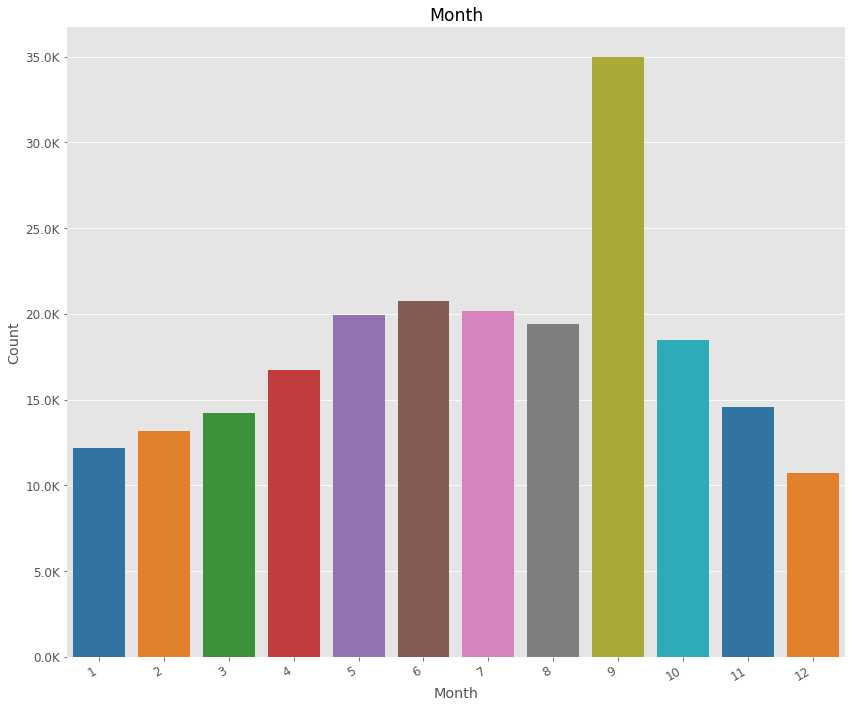

In [48]:
plot_bar(
    x=df_drop['month'].value_counts().keys(), y=df_drop['month'].value_counts().values,
    title='Month', xlabel='Month', ylabel='Count', palette='tab10',
    formatter=format_tsd
)

# Plotting Geographical Data

<AxesSubplot:xlabel='end_lon', ylabel='end_lat'>

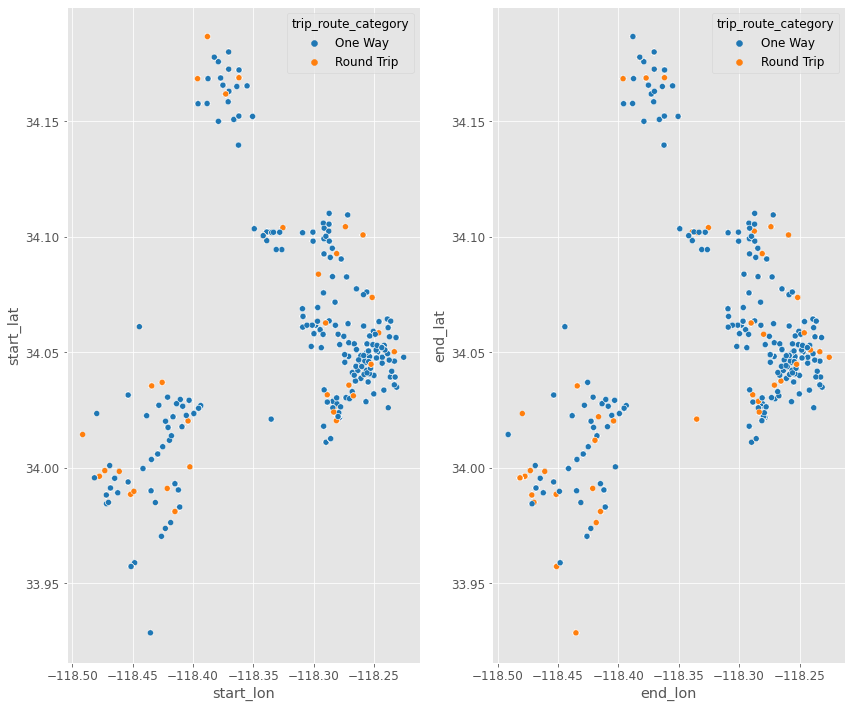

In [49]:
# start_lat: The latitude of the station where the trip originated
# start_lon: The longitude of the station where the trip originated
# end_lat: The latitude of the station where the trip terminated
# end_lon: The longitude of the station where the trip terminated


# assign start and end coordinates
start_lon, start_lat  = df_drop['start_lon'], df_drop['start_lat']
end_lon, end_lat = df_drop['end_lon'], df_drop['end_lat']

# create figure axis
fig, (ax1, ax2) = plt.subplots(1, 2)

# plot starting coordinates
sns.scatterplot(
  data=df_drop,
  x=start_lon, y=start_lat, 
  hue='trip_route_category', palette='tab10',
  ci=None, 
  ax=ax1
)

# plot ending coordinates
sns.scatterplot(
  data=df_drop,
  x=end_lon, y=end_lat,  
  hue='trip_route_category', palette='tab10',
  ci=None,
  ax=ax2
)

In [50]:
df_drop['duration'].describe()

count    215242.000000
mean         40.369705
std          99.009098
min           1.000000
25%           9.000000
50%          19.000000
75%          35.000000
max        1440.000000
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='Density'>

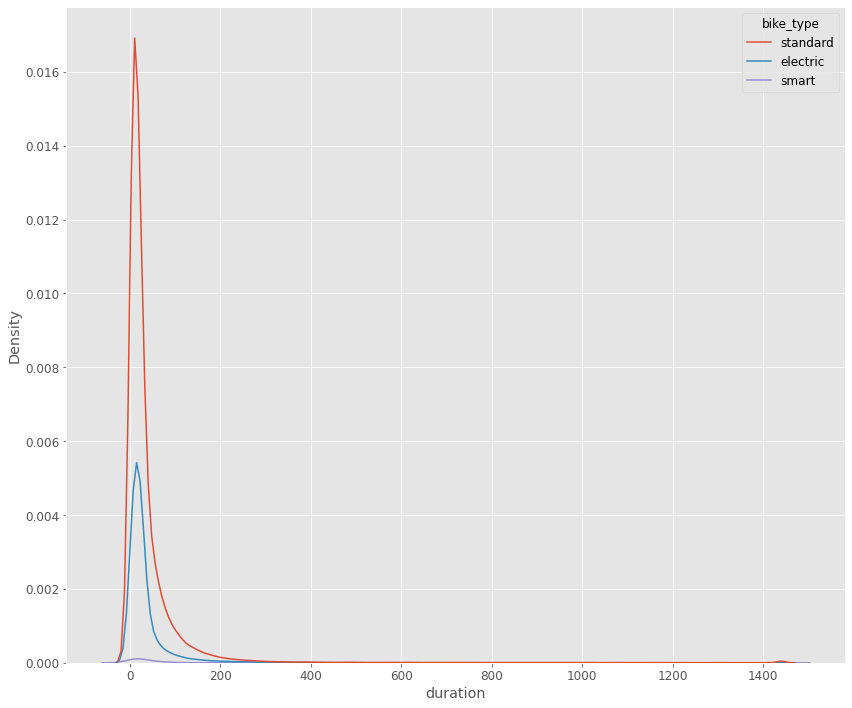

In [51]:
sns.kdeplot(data=df_drop, x='duration', hue='bike_type')

<AxesSubplot:xlabel='duration', ylabel='Density'>

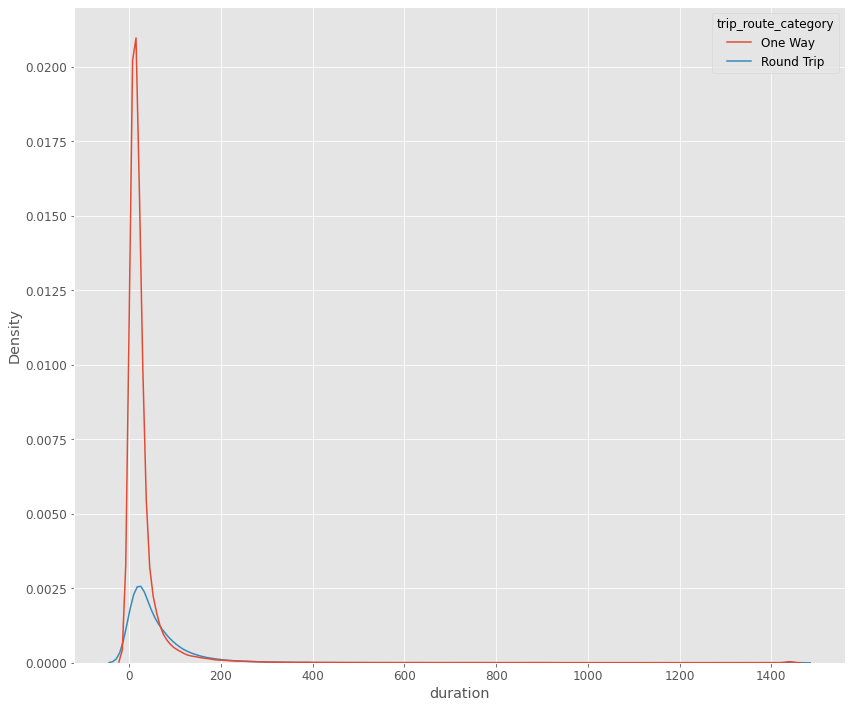

In [52]:
sns.kdeplot(data=df_drop, x='duration', hue='trip_route_category')

<AxesSubplot:xlabel='duration', ylabel='Density'>

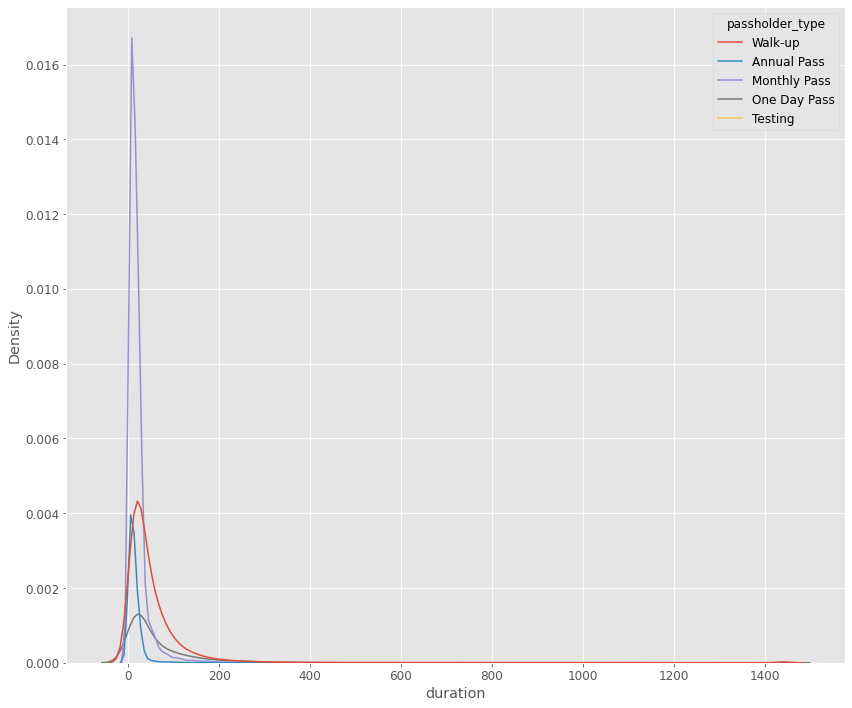

In [53]:
sns.kdeplot(data=df_drop, x='duration', hue='passholder_type')

In [54]:
station_df.describe(exclude='number')

,Station_Name,Day of Go_live_date,Region,Status
count,375,375,374,375
unique,319,156,6,2
top,Westwood & National,7/7/2016,DTLA,Active
freq,3,55,166,220


In [55]:
station_df.drop(columns='Day of Go_live_date', inplace=True)
station_df.head()

,Station_ID,Station_Name,Region,Status
0,3000,Virtual Station,NaN,Active
1,3005,7th & Flower,DTLA,Active
2,3006,Olive & 8th,DTLA,Active
3,3007,5th & Grand,DTLA,Active
4,3008,Figueroa & 9th,DTLA,Active


In [56]:
station_df['Status'].value_counts()

Active      220
Inactive    155
Name: Status, dtype: int64

<function __main__.plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None)>

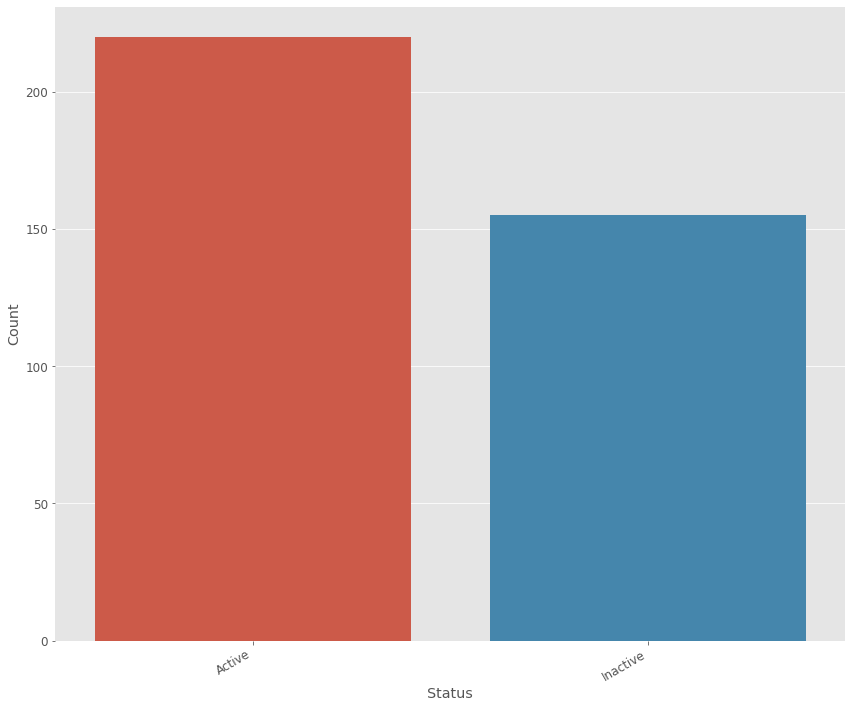

In [57]:
plot_bar(
  x=station_df['Status'].value_counts().keys(),
  y=station_df['Status'].value_counts().values,
  xlabel='Status', ylabel='Count',
  formatter=format_orig
)

In [58]:
# strip columns of white spaces
station_df.columns = station_df.columns.str.strip()

<function __main__.plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None)>

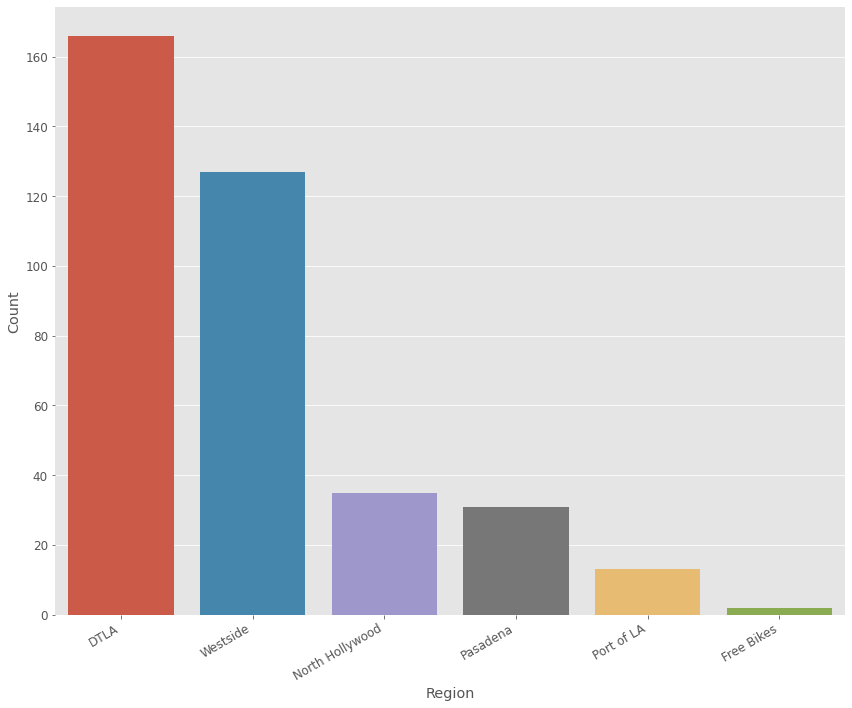

In [59]:
plot_bar(
  data=station_df,
  x=station_df['Region'].value_counts().keys(), y=station_df['Region'].value_counts().values,
  xlabel='Region', ylabel='Count',
  formatter=format_orig
)

# Time Resampling

In [60]:
df_idx = df_drop[['start_time', 'end_time', 'duration', 'trip_route_category', 'passholder_type', 'bike_type']].set_index('start_time')
df_idx

,end_time,duration,trip_route_category,passholder_type,bike_type
start_time,,,,,
2021-01-01 01:45:00,2021-01-01 02:02:00,17,One Way,Walk-up,standard
2021-01-01 02:35:00,2021-01-01 02:42:00,7,One Way,Annual Pass,electric
2021-01-01 04:28:00,2021-01-01 04:36:00,8,One Way,Monthly Pass,standard
2021-01-01 04:43:00,2021-01-01 08:11:00,208,One Way,Walk-up,standard
2021-01-01 05:53:00,2021-01-01 08:02:00,129,Round Trip,Walk-up,standard
...,...,...,...,...,...
2021-12-31 23:29:00,2021-12-31 23:48:00,19,One Way,One Day Pass,standard
2021-12-31 23:40:00,2021-12-31 23:48:00,8,One Way,Annual Pass,standard
2021-12-31 23:47:00,2022-01-01 00:30:00,43,Round Trip,Walk-up,standard


In [61]:
df_idx.describe()

,duration
count,215242.000000
mean,40.369705
std,99.009098
min,1.000000
25%,9.000000
50%,19.000000
75%,35.000000
max,1440.000000


<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

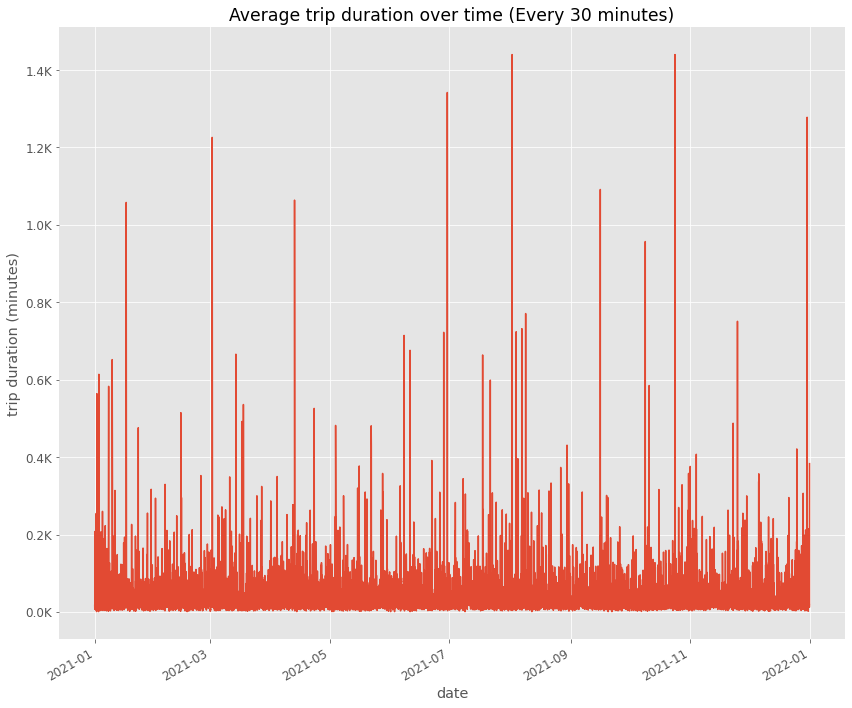

In [62]:
plot_line(
    x='start_time', y='duration', ci=None, 
    data=df_idx.resample('30T').agg(np.mean),                            # total duration sampled every 30 minutes
    title='Average trip duration over time (Every 30 minutes)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

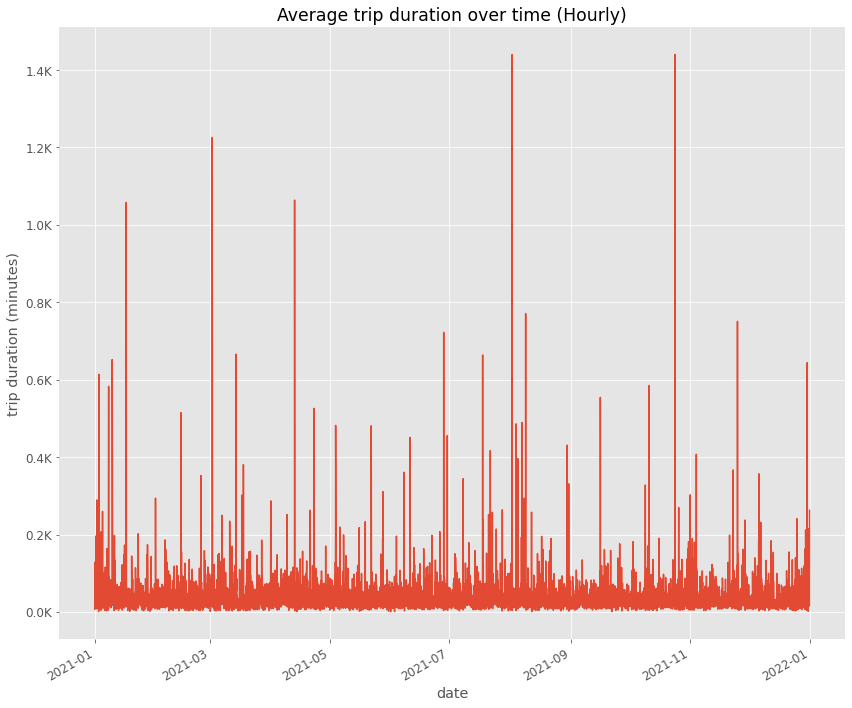

In [63]:
plot_line(
    x='start_time', y='duration', ci=None,
    data=df_idx.resample('1H').agg(np.mean),                            # total duration sampled hourly
    title='Average trip duration over time (Hourly)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

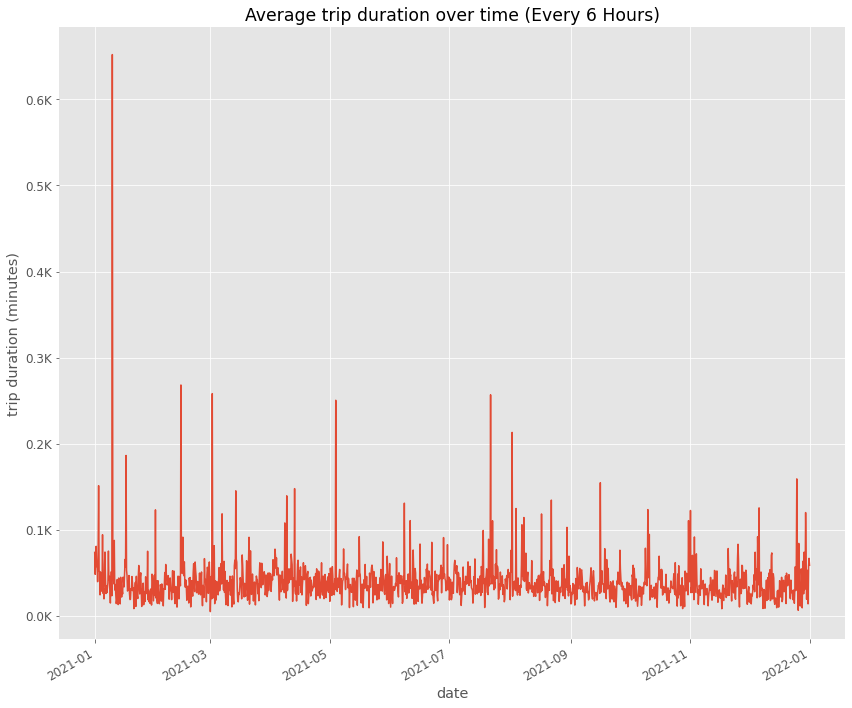

In [64]:
plot_line(
    x='start_time', y='duration', ci=None,
    data=df_idx.resample('6H').agg(np.mean),                            # total duration sampled every 6 hours
    title='Average trip duration over time (Every 6 Hours)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

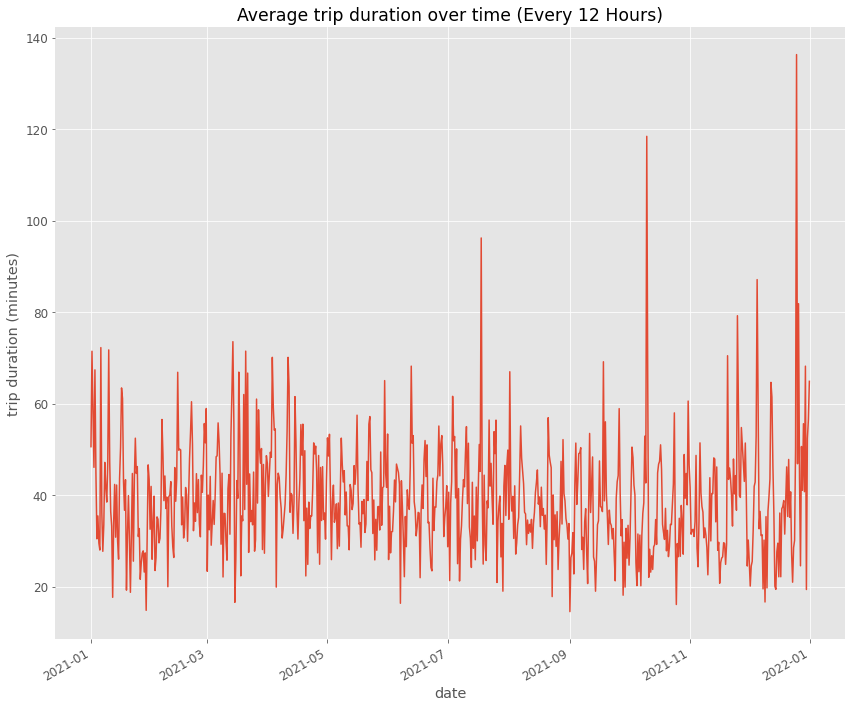

In [65]:
plot_line(
    x='start_time', y='duration', ci=None,
    data=df_idx.resample('12H').agg(np.mean),                            # total duration sampled every 12 hours
    title='Average trip duration over time (Every 12 Hours)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_orig
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

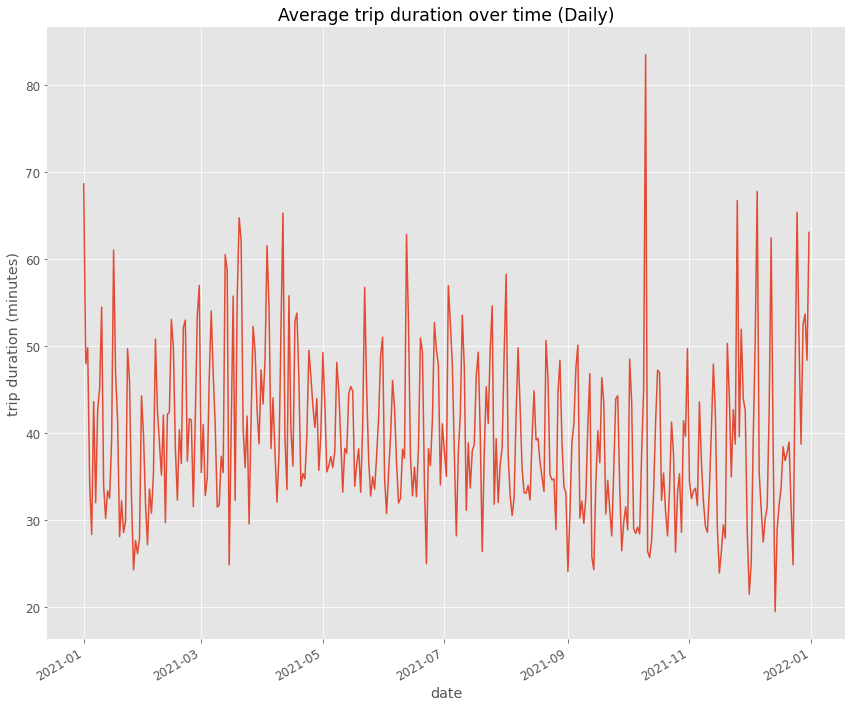

In [66]:
plot_line(
    x='start_time', y='duration', ci=None,
    data=df_idx.resample('D').agg(np.mean),                            # total duration sampled daily
    title='Average trip duration over time (Daily)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_orig
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

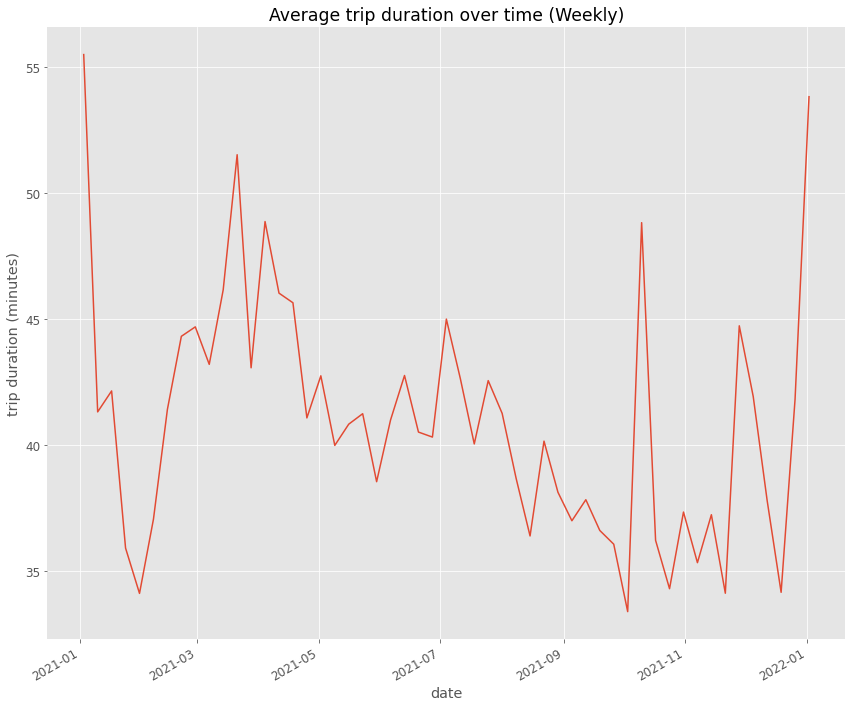

In [67]:
plot_line(
    x='start_time', y='duration', ci=None,
    data=df_idx.resample('W').agg(np.mean),                            # total duration sampled weekly
    title='Average trip duration over time (Weekly)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_orig
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

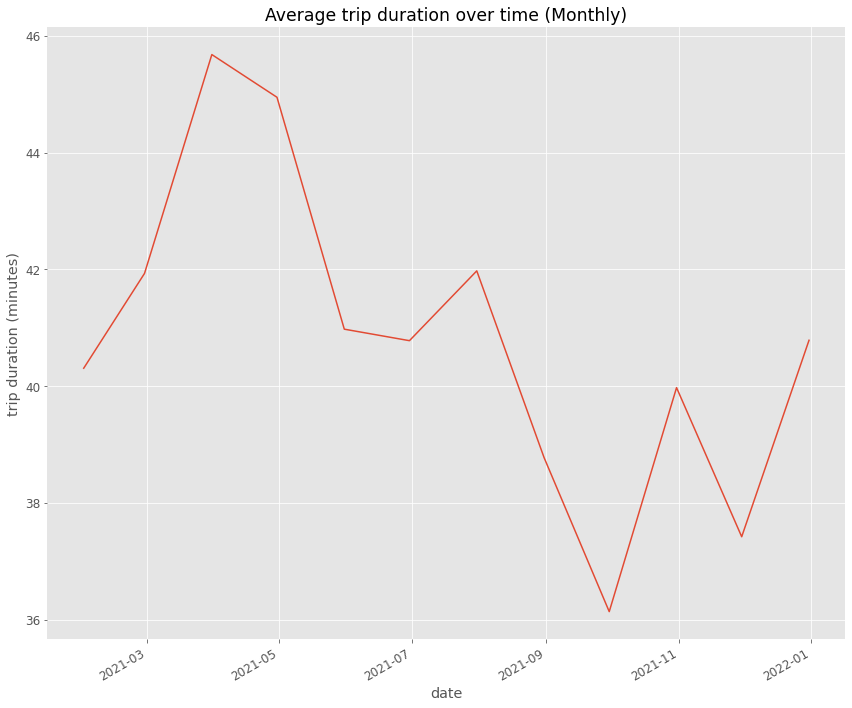

In [68]:
plot_line(
    x='start_time', y='duration', ci=None,
    data=df_idx.resample('M').agg(np.mean),                            # total duration sampled monthly
    title='Average trip duration over time (Monthly)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_orig
)

# Date Truncating or Indexing

<function __main__.plot_date_rng(data, x, y, hue=None, palette=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

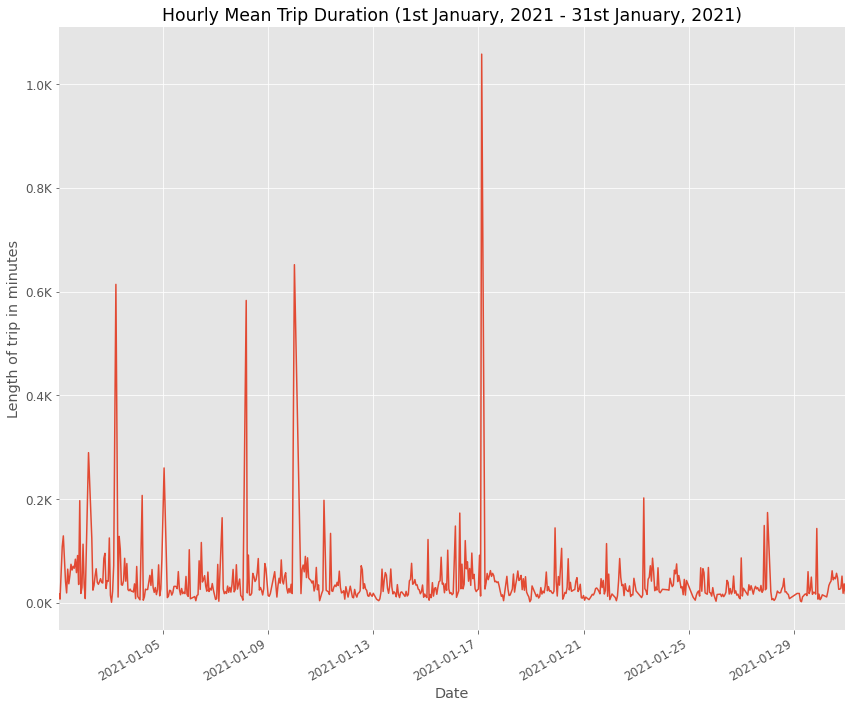

In [69]:
plot_date_rng(
    data=fetch_data(data=df_idx, ascending=True, before='2021-01-01', after='2021-01-31', rule='1H').agg(np.mean),
    x='start_time', y='duration',
    xlabel='Date', ylabel='Length of trip in minutes', title='Hourly Mean Trip Duration (1st January, 2021 - 31st January, 2021)',
    formatter=format_tsd
)

<function __main__.plot_date_rng(data, x, y, hue=None, palette=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

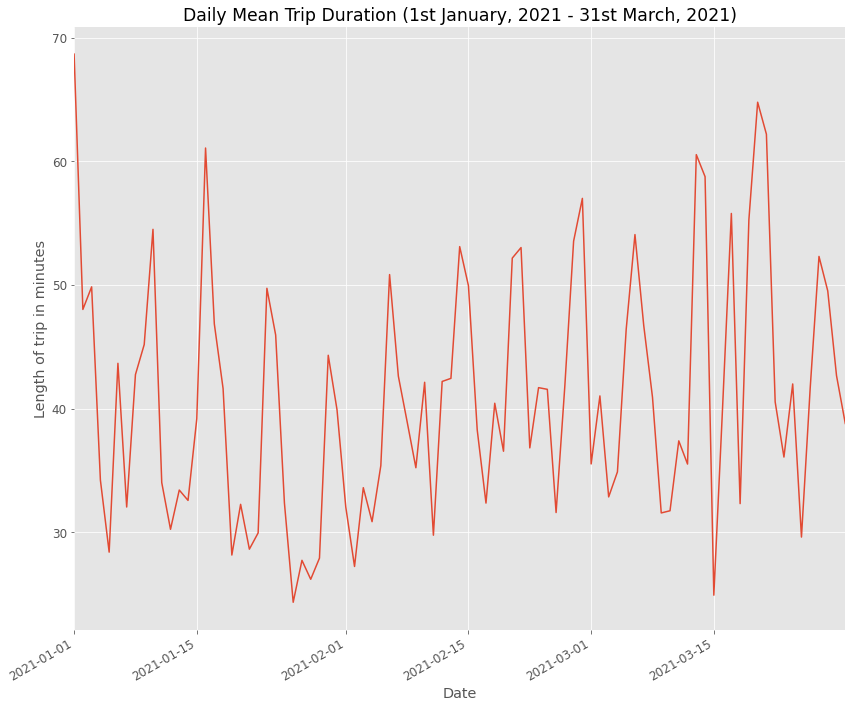

In [70]:
plot_date_rng(
    data=fetch_data(data=df_idx, ascending=True, before='2021-01-01', after='2021-03-31', rule='D').agg(np.mean),
    x='start_time', y='duration',
    xlabel='Date', ylabel='Length of trip in minutes', title='Daily Mean Trip Duration (1st January, 2021 - 31st March, 2021)',
    formatter=format_orig
)

<function __main__.plot_date_rng(data, x, y, hue=None, palette=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

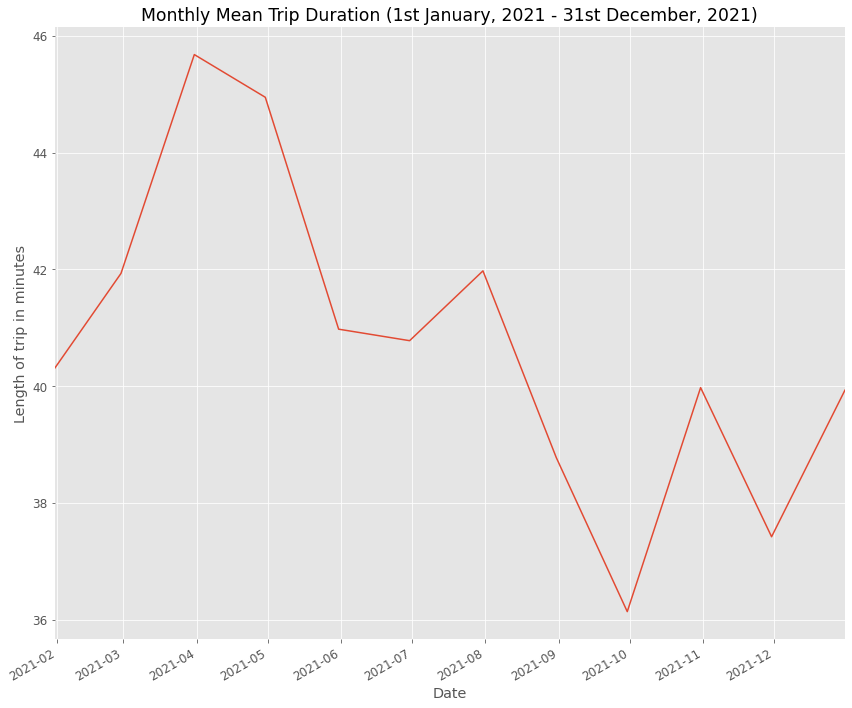

In [71]:
plot_date_rng(
    data=fetch_data(data=df_idx, ascending=True, before='2021-01-01', after='2021-12-31', rule='M').agg(np.mean),
    x='start_time', y='duration',
    xlabel='Date', ylabel='Length of trip in minutes', title='Monthly Mean Trip Duration (1st January, 2021 - 31st December, 2021)',
    formatter=format_orig
)